In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Stockholm,2018
1,Parlez-moi d'amour,1935
2,Tom's Midnight Garden,1999
3,Believe in Me,2006
4,Arnolds Park,2007


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
%%time
cast[cast.title == 'Sleuth']

CPU times: user 536 ms, sys: 14.4 ms, total: 550 ms
Wall time: 633 ms


,title,year,name,type,character,n
258968,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
325302,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
325303,Sleuth,2007,Michael Caine,actor,Andrew,1.0
372290,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
372291,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1287140,Sleuth,2007,Jude Law,actor,Milo,2.0
1441628,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1458303,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1697110,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1797079,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [6]:
%%time
c = cast.set_index(['title'])
c

CPU times: user 262 ms, sys: 79.9 ms, total: 342 ms
Wall time: 424 ms


In [7]:
c = cast.set_index(['title', 'year']).sort_index()
c.loc[('Sleuth', 1972)].reset_index(['year', 'title'])

,title,year,name,type,character,n
0,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
1,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
2,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
3,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
4,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
5,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


In [8]:
%%time
c.loc[('Sleuth',  1972)]

CPU times: user 912 µs, sys: 85 µs, total: 997 µs
Wall time: 977 µs


name     type                   character    n
title  year                                                              
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2.0
       1972      Alec Cawthorne    actor           Inspector Doppler  3.0
       1972        Teddy Martin    actor      Police Constable Higgs  6.0
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4.0
       1972    Laurence Olivier    actor                 Andrew Wyke  1.0
       1972  Eve (III) Channing  actress             Marguerite Wyke  5.0

In [19]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby([c.year // 10 * 10]).n.size()

year
1980     3
1990    14
2000    20
2010    10
Name: n, dtype: int64

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

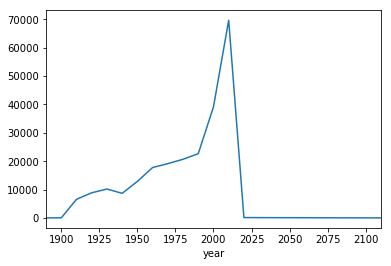

In [21]:
titles.groupby([titles.year // 10 * 10]).size().plot()

### Use groupby() to plot the number of "Hamlet" films made each decade.

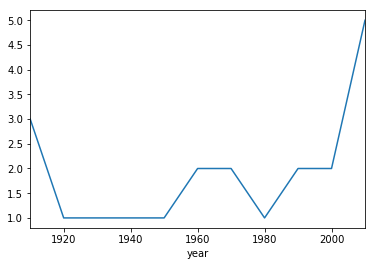

In [22]:
hamletTitles = titles[titles.title == "Hamlet"]
hamletTitles.groupby([hamletTitles.year // 10 * 10]).size().plot()

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [24]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      628
      actress    286
1951  actor      651
      actress    285
1952  actor      614
      actress    303
1953  actor      660
      actress    306
1954  actor      641
      actress    310
1955  actor      650
      actress    282
1956  actor      664
      actress    310
1957  actor      736
      actress    304
1958  actor      715
      actress    296
1959  actor      736
      actress    322
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [26]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n <= 5.0]
c.groupby(['year', 'type', 'n']).size()

year  type     n  
1950  actor    1.0    628
               2.0    441
               3.0    509
               4.0    536
               5.0    560
      actress  1.0    286
               2.0    416
               3.0    318
               4.0    271
               5.0    228
1951  actor    1.0    651
               2.0    459
               3.0    560
               4.0    578
               5.0    581
      actress  1.0    285
               2.0    427
               3.0    297
               4.0    257
               5.0    255
1952  actor    1.0    614
               2.0    438
               3.0    543
               4.0    532
               5.0    550
      actress  1.0    303
               2.0    441
               3.0    305
               4.0    283
               5.0    231
                     ... 
1957  actor    1.0    736
               2.0    483
               3.0    614
               4.0    607
               5.0    600
      actress  1.0    304
               2.0 

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [30]:
c = cast
c = c[c.title == "The Pink Panther"]
c.groupby(['title', 'year']).size()

title             year
The Pink Panther  1963    21
                  2006    90
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [37]:
c = cast
c = c[(c.name == "Frank Oz")]
g = c.groupby(['year','title']).size()
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [41]:
c = cast
c = c[(c.name == "Frank Oz")]
g = c.groupby(['character']).size()
g[g >= 2].sort()

AttributeError: 'Series' object has no attribute 'sort'